<a href="https://colab.research.google.com/github/Hich11/ML-Prjects/blob/master/Time_Series_Prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from prophet import Prophet

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df=pd.read_csv('/content/Train.csv')

In [53]:
df.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


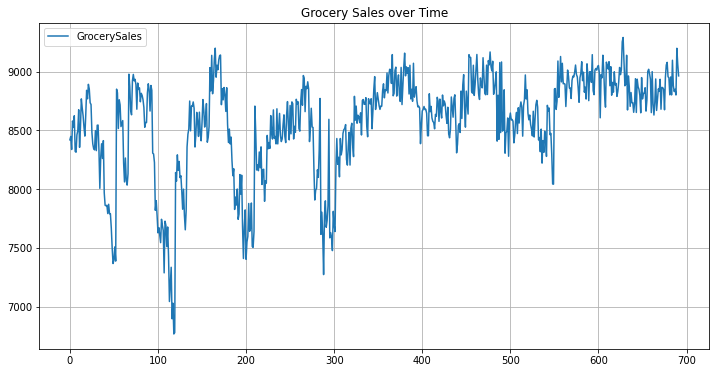

In [55]:
df['GrocerySales'].plot(figsize=(12,6))
plt.legend()
plt.title('Grocery Sales over Time')
plt.grid()

In [56]:
# rename columns to fit proohet model 
df.columns=['ds','y']

In [57]:
df.head()

,ds,y
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [58]:
#initialize model
model=Prophet()

In [13]:
#generate a list of dates equal to data size to feed into the model
ds=pd.date_range(start='2018-01-01',periods=692,freq='D')

In [60]:
#convert to a Serie
ts=pd.Series(ds)

In [61]:
# convert indexes in df to TS
df['ds']=ts

In [62]:
df.head()

,ds,y
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


In [63]:
#fit the model
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
#check seasonibility(by default the model takes seasonobility on weeakly basis : ds are generated on daily basis)
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [69]:
# append 365 days of forecast
future_dates=model.make_future_dataframe(periods=365)

In [70]:
future_dates

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1052,2020-11-18
1053,2020-11-19
1054,2020-11-20
1055,2020-11-21


In [71]:
#predict the future dates
pred=model.predict(future_dates)

In [72]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,8440.079650,8026.475579,8903.977759,8440.079650,8440.079650,15.041318,15.041318,15.041318,15.041318,15.041318,15.041318,0.0,0.0,0.0,8455.120968
1,2018-01-02,8438.135350,7974.591549,8907.160563,8438.135350,8438.135350,-3.661750,-3.661750,-3.661750,-3.661750,-3.661750,-3.661750,0.0,0.0,0.0,8434.473600
2,2018-01-03,8436.191050,7975.784691,8847.958624,8436.191050,8436.191050,-28.423092,-28.423092,-28.423092,-28.423092,-28.423092,-28.423092,0.0,0.0,0.0,8407.767959
3,2018-01-04,8434.246751,7997.064883,8891.650498,8434.246751,8434.246751,11.484935,11.484935,11.484935,11.484935,11.484935,11.484935,0.0,0.0,0.0,8445.731686
4,2018-01-05,8432.302451,7957.794725,8892.560928,8432.302451,8432.302451,6.505686,6.505686,6.505686,6.505686,6.505686,6.505686,0.0,0.0,0.0,8438.808137


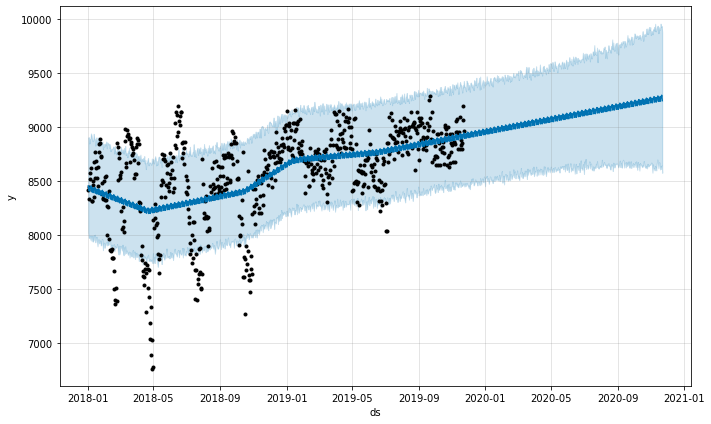

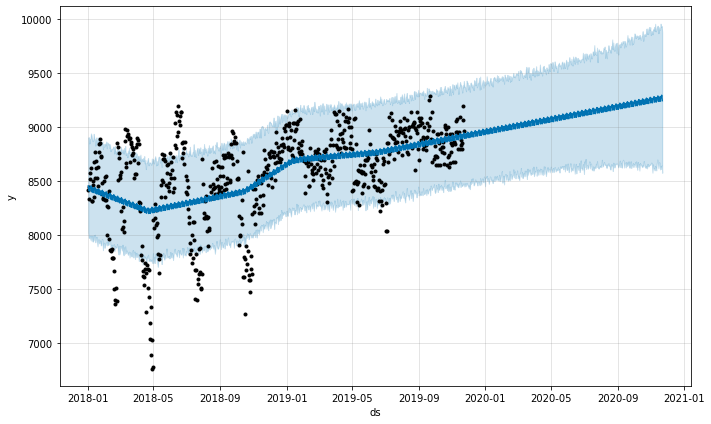

In [73]:
#plot results
model.plot(pred)

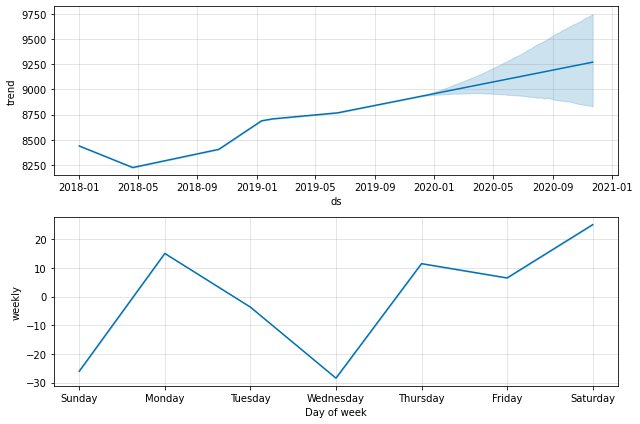

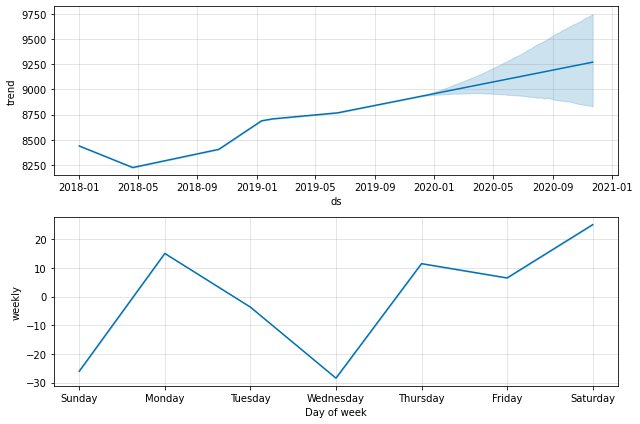

In [74]:
model.plot_components(pred)

In [75]:
from fbprophet.diagnostics import cross_validation

In [76]:
df_cv=cross_validation(model,initial='365 days',period='90 days', horizon='180 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-02-26 00:00:00 and 2019-05-27 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

In [77]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-27,8862.237448,8331.674492,9398.130823,8604.36,2019-02-26
1,2019-02-28,8903.273388,8363.743911,9447.140542,8800.05,2019-02-26
2,2019-03-01,8907.405419,8337.223058,9459.923461,8707.58,2019-02-26
3,2019-03-02,8898.988887,8391.754115,9440.317094,8749.14,2019-02-26
4,2019-03-03,8846.833411,8280.014720,9379.054947,8723.72,2019-02-26


In [78]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,18 days,65898.581771,256.707191,210.315334,0.024545,0.022427,0.972222
1,19 days,71518.327264,267.429107,217.681176,0.025446,0.022427,0.972222
2,20 days,76034.148533,275.742903,226.108213,0.026443,0.022735,0.972222
3,21 days,79922.584045,282.705826,232.474473,0.027204,0.023895,0.972222
4,22 days,87886.099153,296.455897,248.504235,0.029119,0.026173,0.972222


In [79]:
from fbprophet.plot import plot_cross_validation_metric

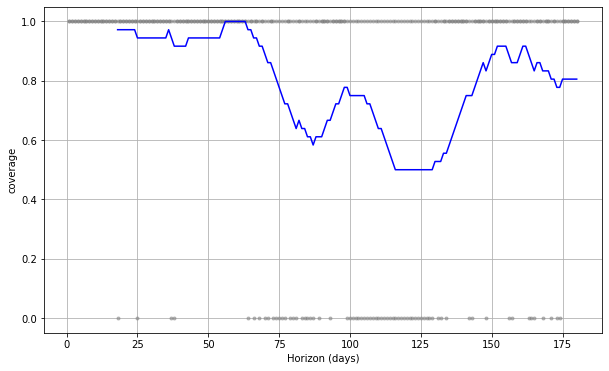

In [80]:
fig=plot_cross_validation_metric(df_cv,metric='coverage')

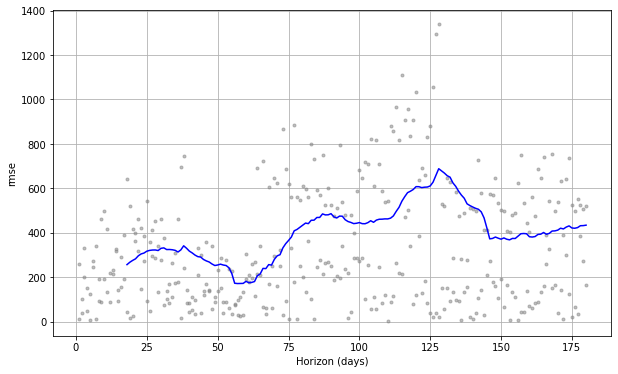

In [81]:
fig=plot_cross_validation_metric(df_cv,metric='rmse')

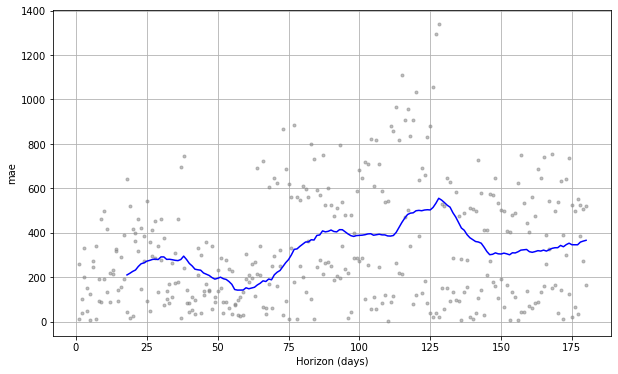

In [82]:
fig=plot_cross_validation_metric(df_cv,metric='mae')